# Lesson 14 Activity: Advanced Statistics

## Learning Objectives

This activity will help you to:

1. Apply appropriate statistical tests to real-world data
2. Interpret hypothesis test results and p-values
3. Compare multiple groups using statistical methods
4. Make data-driven conclusions based on statistical evidence

## Setup

Import the required libraries and load the weather dataset.

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



In [627]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df_weather = pd.read_csv(url)
print(df_weather.describe().T)
df_weather.head()

                  count         mean        std    min      25%      50%  \
temperature_c     365.0     5.753425   7.720141  -10.0     0.70     5.70   
rainfall_inches   365.0     0.303699   0.311469    0.0     0.08     0.21   
humidity_percent  365.0    66.182740  18.232318   23.4    53.90    66.80   
pressure_hpa      365.0  1012.346301   7.437610  983.7  1007.50  1013.20   

                     75%      max  
temperature_c       10.7    25.00  
rainfall_inches      0.4     2.23  
humidity_percent    79.4   100.00  
pressure_hpa      1017.6  1039.00  


,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: Humidity Differences Among Weather Conditions

**Objective**: Determine if humidity is significantly different among different weather conditions.

**Background**: 
The weather dataset contains humidity measurements for different weather conditions (Sunny, Rainy, Cloudy, etc.). We want to know if these weather conditions are associated with significantly different humidity levels.

**Tasks**:

1. **Explore the data**:
   - Check how many unique weather conditions are in the dataset
   - Calculate the mean and standard deviation of humidity for each weather condition
   - Create a boxplot showing the humidity distribution for each weather condition
   - Based on the visualization, do you think the humidity levels differ significantly?

2. **Choose an appropriate statistical test**:
   - Since we're comparing humidity across multiple groups (weather conditions), what test should we use?
   - Hint: Consider ANOVA (Analysis of Variance) or Kruskal-Wallis test
   - State your null and alternative hypotheses

3. **Check assumptions** (if using ANOVA):
   - Are the sample sizes roughly equal across groups?
   - Use a visualization or test to check if the data appears roughly normally distributed
   - Check for equal variances across groups (you can use a simple visual check or Levene's test)

4. **Perform the statistical test**:
   - Conduct the chosen test using scipy.stats
   - Report the test statistic and p-value
   - Using α = 0.05, determine whether to reject or accept the null hypothesis

5. **Interpret the results**:
   - What does your test result tell you about humidity and weather conditions?
   - If you rejected the null hypothesis, which weather conditions appear to have different humidity levels? (Use the boxplot and descriptive statistics to support your conclusion)
   - What are the practical implications of this finding?

**Bonus**: 
- If you found a significant difference, perform post-hoc pairwise comparisons to determine which specific weather conditions differ from each other
- Consider whether Bonferroni correction should be applied to the pairwise comparisons

Data Exploration
1. Check how many unique weather conditions are in the dataset
There are 4 weather conditions
['Sunny', 'Snowy', 'Rainy', 'Cloudy']


Calculate the mean and standard deviation of humidity for each weather condition
                        mean        std
weather_condition                      
Cloudy             67.741121  12.334473
Rainy              85.812676  10.342104
Snowy              79.673529  10.793273
Sunny              52.985621  14.754123


Boxplot showing the humidity distribution for each weather condition



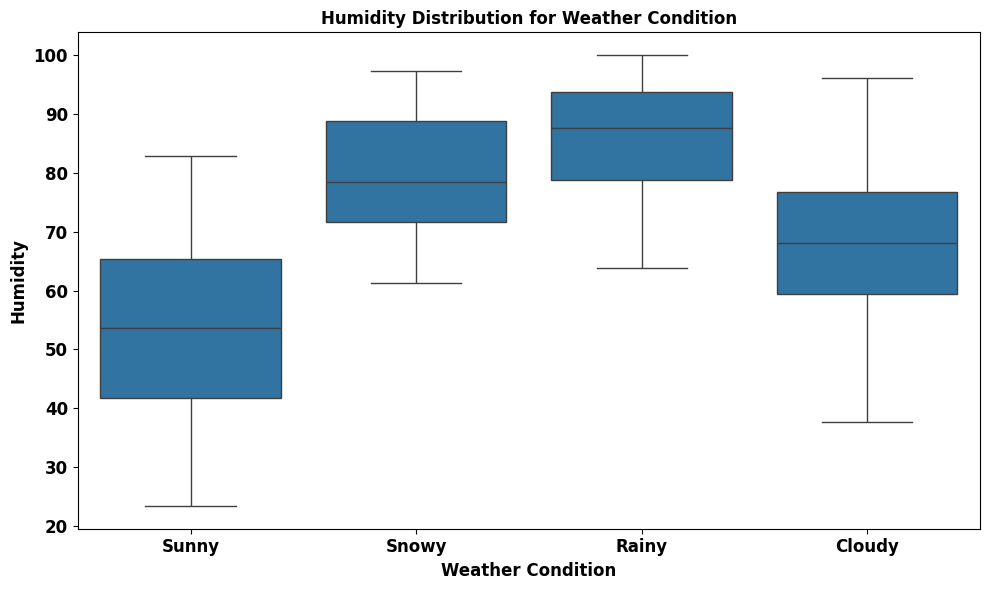


Check whether 2 categories of weather conditions via ks_2amp
<class 'numpy.float64'>
--------------------------------------------------
ks_2samp() Results:0.0333544593440219
Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)
Humidity Levels differ significantly across Weather Conditions

Check whether 4 categories of weather conditions
--------------------------------------------------
kruskal() Results:5.720370728515671e-40
Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)
(34,)
(71,)
(153,)
(107,)
--------------------------------------------------
anderson_ksamp() Results:0.001
critical_values: 25%: 0.4985491840485418
critical_values: 10%: 1.3236709006307399
critical_values: 5%: 1.9157768158438997
critical_values: 2.5%: 2.493042125965547
critical_values: 1%: 3.245932190463498
critical_values: 0.5%: 3.822856036364275
critical_values: 0.1%: 5.120787889787164
Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)
----------------------------------

C:\Users\jxbma\AppData\Local\Temp\ipykernel_20360\2615235936.py:69: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  statsitic, critical_values, p_value = stats.anderson_ksamp([snowy_humidity, rainy_humidity, sunny_humidity, cloudy_humidity])


In [628]:
print('Data Exploration')
print('1. Check how many unique weather conditions are in the dataset')
unique_weather_conditions = df_weather['weather_condition'].unique().tolist()
number_of_unique_weather_conditions = len(unique_weather_conditions)
print(f'There are {number_of_unique_weather_conditions} weather conditions')
print(unique_weather_conditions)
print()
print()

print('Calculate the mean and standard deviation of humidity for each weather condition')
humidity_statistics = df_weather.groupby('weather_condition')['humidity_percent'].aggregate(['mean', 'std'])
print(humidity_statistics)
print()
print()

print('Boxplot showing the humidity distribution for each weather condition')
print()

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_weather,
            x='weather_condition',
            y='humidity_percent')

plt.title('Humidity Distribution for Weather Condition', fontweight='bold',fontsize=12)
plt.xlabel('Weather Condition', fontweight='bold',fontsize=12)
plt.ylabel('Humidity', fontweight='bold',fontsize=12)
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

# Check whether 2 samples are same/different via ks_2amp
print()
print('Check whether 2 categories of weather conditions via ks_2amp')
snowy_humidity = df_weather[df_weather['weather_condition'] == 'Snowy']['humidity_percent']
rainy_humidity = df_weather[df_weather['weather_condition'] == 'Rainy']['humidity_percent']
sunny_humidity = df_weather[df_weather['weather_condition'] == 'Sunny']['humidity_percent']
cloudy_humidity = df_weather[df_weather['weather_condition'] == 'Cloudy']['humidity_percent']

statistic, p_value = stats.ks_2samp(snowy_humidity, rainy_humidity)
print(type(p_value))  # Should be float
print('--------------------------------------------------')
print(f'ks_2samp() Results:{p_value}')

if p_value < 0.05:
    print("Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)")
else:
    print("Rainy/Snowy Distributions are the SAME (fail to reject null hypothesis)")

print('Humidity Levels differ significantly across Weather Conditions')

print()
print('Check whether 4 categories of weather conditions')
statsitic, p_value = stats.kruskal(snowy_humidity, rainy_humidity, sunny_humidity, cloudy_humidity)
print('--------------------------------------------------')
print(f'kruskal() Results:{p_value}')

if p_value < 0.05:
    print("Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)")
else:
    print("Rainy/Snowy Distributions are the SAME (fail to reject null hypothesis)")

print(snowy_humidity.shape)
print(rainy_humidity.shape)
print(sunny_humidity.shape)
print(cloudy_humidity.shape)
statsitic, critical_values, p_value = stats.anderson_ksamp([snowy_humidity, rainy_humidity, sunny_humidity, cloudy_humidity])
print('--------------------------------------------------')
print(f'anderson_ksamp() Results:{p_value}')
print(f'critical_values: 25%: {critical_values[0]}')
print(f'critical_values: 10%: {critical_values[1]}')
print(f'critical_values: 5%: {critical_values[2]}')
print(f'critical_values: 2.5%: {critical_values[3]}')
print(f'critical_values: 1%: {critical_values[4]}')
print(f'critical_values: 0.5%: {critical_values[5]}')
print(f'critical_values: 0.1%: {critical_values[6]}')

if p_value < 0.05:
    print("Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)")
else:
    print("Rainy/Snowy Distributions are the SAME (fail to reject null hypothesis)")    

statsitic, p_value = stats.f_oneway(snowy_humidity, rainy_humidity, sunny_humidity, cloudy_humidity)
print('--------------------------------------------------')
print(f'f_oneway() Results:{p_value}')

if p_value < 0.05:
    print("Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)")
else:
    print("Rainy/Snowy Distributions are the SAME (fail to reject null hypothesis)")



### ANOVA Statistical Test ###
**Null Hypothesis** The Humidity Percentage rates do not differ across Weather Conditions</br>
**Alternate Hypothesis** The Humidity Percentage rates differ across Weather Conditions</br>

#### Check sample sizes across different Weather conditions ####

weather_condition
Sunny     153
Cloudy    107
Rainy      71
Snowy      34
Name: count, dtype: int64
--------------------------------------------------
ANOVA ==>> f_oneway() Results:5.702757871173804e-54
Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)
--------------------------------------------------


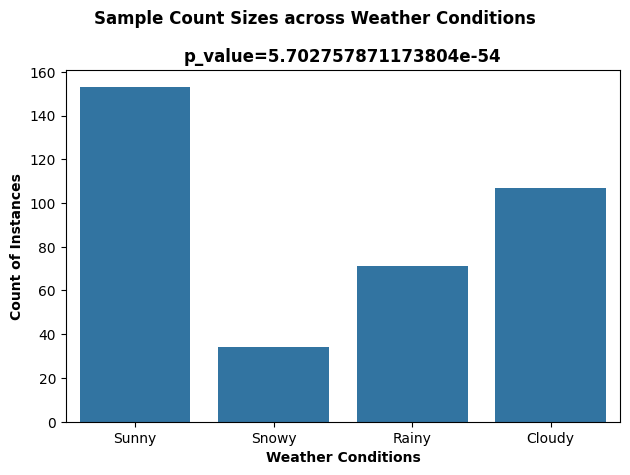

In [629]:
weather_condition_sample_sizes = df_weather['weather_condition'].value_counts()
print(weather_condition_sample_sizes)

sns.countplot(data=df_weather, x='weather_condition')

# Calculate statistics
mean_val = weather_condition_sample_sizes.mean()
median_val = weather_condition_sample_sizes.median()
mode_val = weather_condition_sample_sizes.mode()[0] 

statistic, p_value = stats.f_oneway(snowy_humidity, rainy_humidity, sunny_humidity, cloudy_humidity)
print('--------------------------------------------------')
print(f'ANOVA ==>> f_oneway() Results:{p_value}')

if p_value < 0.05:
    print("Rainy/Snowy Distributions are DIFFERENT (reject null hypothesis)")
else:
    print("Rainy/Snowy Distributions are the SAME (fail to reject null hypothesis)")
    
print('--------------------------------------------------')

# Title and Label axes
plt.suptitle('Sample Count Sizes across Weather Conditions', fontweight='bold')
plt.title(f'p_value={p_value}', fontweight='bold')
plt.xlabel('Weather Conditions', fontweight='bold')
plt.ylabel('Count of Instances', fontweight='bold')

plt.tight_layout(h_pad=5)
plt.show()



#### Results ####
    There is a correlation between humidity levels and weather conditions.

    Null Hypothesis is rejectd, so Alternative Hypothesis is accepted (The Humidity Percentage rates differ across Weather Conditions)
    They all have varied humidity levels relative to each other.
    Sunny -> [Rainy, Snowy]  and Cloudy -> [Rainy, Snowy] have the starkest visible differences relative to each other
    Humidity levels are highest when there is precepitation present

## Exercise 2: Testing for Association Between Weather Condition and Wind Strength

**Objective**: Determine if there is a significant association (non-random relationship) between weather condition and wind strength.

**Background**: 
If weather conditions and wind strength are independent, we would expect days to be randomly distributed across all combinations of weather condition and wind strength. However, certain weather conditions might be more likely to occur with certain wind strengths (e.g., rainy days might be associated with stronger winds). We can use a chi-square test of independence to test this.

**Tasks**:

1. **Explore the data**:
   - Check the unique values in both `weather_condition` and `wind_strength` columns
   - Count how many days fall into each category for both variables
   - Create a contingency table (crosstab) showing the count of days for each combination of weather condition and wind strength
   - Use `pd.crosstab(df['weather_condition'], df['wind_strength'])` to create this table

2. **Visualize the relationship**:
   - Create a heatmap of the contingency table to visualize the distribution of days
   - You can use `plt.imshow()` or `sns.heatmap()` if seaborn is available
   - Based on the visualization, do certain weather conditions appear to be associated with certain wind strengths?

3. **State your hypotheses**:
   - **Null hypothesis**: Weather condition and wind strength are independent (days are randomly distributed across combinations)
   - **Alternative hypothesis**: Weather condition and wind strength are associated (days are NOT randomly distributed)

4. **Perform a chi-square test of independence**:
   - Use `scipy.stats.chi2_contingency()` on your contingency table
   - This test compares the observed frequencies to expected frequencies if the variables were independent
   - Report the chi-square statistic, p-value, and degrees of freedom

5. **Interpret the results**:
   - Using α = 0.05, determine whether to reject or accept the null hypothesis
   - If you reject the null hypothesis, what does this mean in practical terms?

6. **Draw conclusions**: Are weather condition and wind strength independent or associated?

Data Exploration
1. Check how many unique weather conditions and wind strings are in the dataset
There are 4 weather conditions
['Sunny', 'Snowy', 'Rainy', 'Cloudy']

There are 5 wind strengths
['Light Breeze', 'Gale', 'Strong Wind', 'Calm', 'Moderate Wind']


Weather Conditions: weather_condition
Sunny     153
Cloudy    107
Rainy      71
Snowy      34
Name: count, dtype: int64

Wind Strength: wind_strength
Light Breeze     121
Moderate Wind     98
Calm              66
Strong Wind       55
Gale              25
Name: count, dtype: int64
CrossTab Type:<class 'pandas.core.frame.DataFrame'>


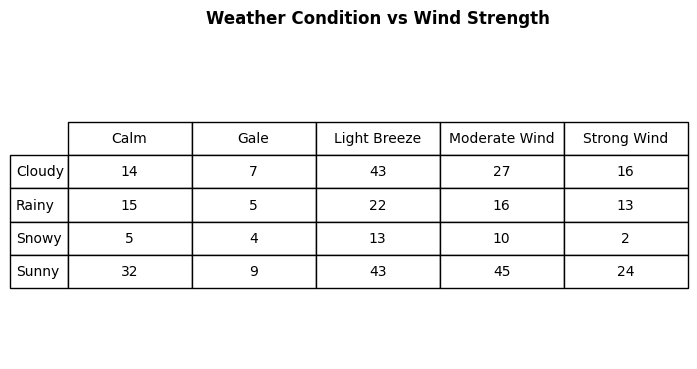

In [630]:
print('Data Exploration')
print('1. Check how many unique weather conditions and wind strings are in the dataset')
unique_weather_conditions = df_weather['weather_condition'].unique().tolist()
number_of_unique_weather_conditions = len(unique_weather_conditions)
print(f'There are {number_of_unique_weather_conditions} weather conditions')
print(unique_weather_conditions)
print()
unique_wind_strengths = df_weather['wind_strength'].unique().tolist()
number_of_unique_wind_strengths = len(unique_wind_strengths)
print(f'There are {number_of_unique_wind_strengths} wind strengths')
print(unique_wind_strengths)
print()
print()

weather_condition_counts = df_weather['weather_condition'].value_counts()
wind_strength_counts = df_weather['wind_strength'].value_counts()
print(f'Weather Conditions: {weather_condition_counts}')
print()
print(f'Wind Strength: {wind_strength_counts}')

pd.crosstab(df_weather['weather_condition'], df_weather['wind_strength'])

# Create crosstab
ct = pd.crosstab(df_weather['weather_condition'], df_weather['wind_strength'])
print(f'CrossTab Type:{type(ct)}')

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=ct.values, 
                 rowLabels=ct.index, 
                 colLabels=ct.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)  # Adjust cell height

plt.title('Weather Condition vs Wind Strength', fontweight='bold', pad=20)
plt.show()

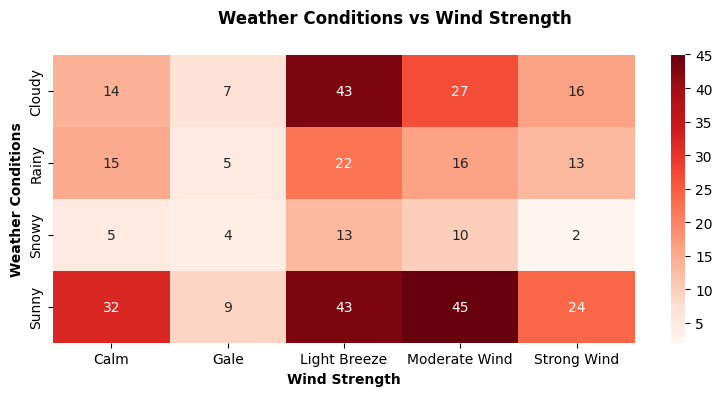

In [631]:
# Create figure
plt.subplots(figsize=(8, 4))

sns.heatmap(ct, annot=True, fmt='d', cmap='Reds')

# Title and Label axes
plt.suptitle('Weather Conditions vs Wind Strength', fontweight='bold')
plt.xlabel('Wind Strength', fontweight='bold')
plt.ylabel('Weather Conditions', fontweight='bold')

plt.tight_layout(h_pad=5)
plt.show()

#### Weather Conditions Associated with Wind Strengths ####
    Cloudy  ===>>> Light thru Strong Wind 
    Sunny   ===>>> Calm thru Strong Wind [Light Breeze - Strong Wind]
    Snowy   ===>>> Light thru Moderate
    Rainy   ===>>> Light thru String Wind

#### **Hypothesis** ####
    Null Hypothesis --  Weather Condition and Wind Strength are NOT associated with each other (independent - (days randomly distributed)) #####
    Alternate Hypothesis -- Weather Condition and Wind Strength ARE associated - (days not randomly distributed)#####

In [632]:
# Peform chi-square test of independence

# Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(ct)
print(f'chi2_contingency test for Wind Strength vs Weather Condition: p_value: {p_value}')
print(f'chi2_contingency test for Wind Strength vs Weather Condition: chi2 - chisquare_statistic {chi2}')


if p_value < 0.05:
    print("Weather Condition/Wind Strength Distributions are DIFFERENT (reject null hypothesis)")
else:
    print("Weather Condition/Wind Strength Distributions the SAME (fail to reject null hypothesis)")

chi2_contingency test for Wind Strength vs Weather Condition: p_value: 0.546705338072397
chi2_contingency test for Wind Strength vs Weather Condition: chi2 - chisquare_statistic 10.793366982250229
Weather Condition/Wind Strength Distributions the SAME (fail to reject null hypothesis)


#### Results ####
    There is no correlation between weather condition  and wind speed.

    Null Hypothesis is accepted, so Alternative Hypothesis is rejected
    The variables are indepedent of each other

## Exercise 3: Testing for Relationship Between Humidity and Pressure

**Objective**: Determine if there is a significant linear relationship between humidity (%) and atmospheric pressure (hPa).

**Background**: 
When working with two continuous variables, we can test whether they are correlated. Correlation measures the strength and direction of a linear relationship. In meteorology, understanding relationships between variables like humidity and pressure can help improve weather predictions.

**Tasks**:

1. **Explore the data**:
   - Check for any missing values in `humidity_percent` and `pressure_hpa`
   - Calculate basic descriptive statistics (mean, std, min, max) for both variables
   - Create a scatter plot of humidity vs. pressure
   - Based on the visualization, do you think there's a relationship? If so, is it positive or negative?

2. **Choose an appropriate correlation test**:
   - Since we have two continuous variables, we can use Pearson or Spearman correlation
   - Pearson correlation measures linear relationships and assumes normality
   - Spearman correlation measures monotonic relationships and is more robust
   - Check the distributions of both variables (histograms or Q-Q plots) to help decide
   - State your null and alternative hypotheses

3. **Perform the correlation test**:
   - Calculate both Pearson and Spearman correlation coefficients
   - Use `scipy.stats.pearsonr()` and `scipy.stats.spearmanr()`
   - Report the correlation coefficient (r) and p-value for each test
   - Using α = 0.05, determine whether the correlation is statistically significant

4. **Interpret the correlation coefficient**:
   - What is the direction of the relationship (positive or negative)?
   - What is the strength of the relationship? (Hint: |r| < 0.3 weak, 0.3-0.7 moderate, > 0.7 strong)
   - Calculate the coefficient of determination (r²) - what percentage of variance in one variable is explained by the other?

5. **Draw conclusions**:
   - Is there a statistically significant relationship between humidity and pressure?
   - Is the relationship strong enough to be practically useful?

                  count         mean        std    min      25%      50%  \
temperature_c     365.0     5.753425   7.720141  -10.0     0.70     5.70   
rainfall_inches   365.0     0.303699   0.311469    0.0     0.08     0.21   
humidity_percent  365.0    66.182740  18.232318   23.4    53.90    66.80   
pressure_hpa      365.0  1012.346301   7.437610  983.7  1007.50  1013.20   

                     75%      max  
temperature_c       10.7    25.00  
rainfall_inches      0.4     2.23  
humidity_percent    79.4   100.00  
pressure_hpa      1017.6  1039.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   weather_condition  365 non-null    object 
 1   wind_strength      365 non-null    object 
 2   temperature_c      365 non-null    float64
 3   rainfall_inches    365 non-null    float64
 4   humidity_percent   365 non-null    float64

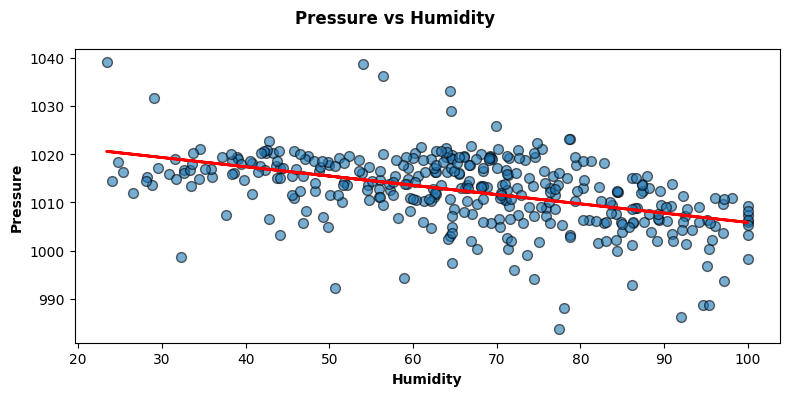

In [633]:
# Explore Data
print(df_weather.describe().T)
print(df_weather.info())
print(df_weather.isnull().sum())

print()
print('There are no missing values for pressure or humidity percent')

plt.subplots(figsize=(8, 4))

# Scatter pressure vs humidity
plt.scatter(df_weather['humidity_percent'], df_weather['pressure_hpa'], 
                alpha=0.6, edgecolors='black', s=50)

# Title and Label axes
plt.suptitle('Pressure vs Humidity', fontweight='bold')
plt.xlabel('Humidity', fontweight='bold')
plt.ylabel('Pressure', fontweight='bold')

# Add trend line to strongest
# Calculate trendline
polyfit = np.polyfit(df_weather['humidity_percent'], df_weather['pressure_hpa'], 1)
p = np.poly1d(polyfit)

# Plot trendline
plt.plot(df_weather['humidity_percent'], p(df_weather['humidity_percent']), 
         "r-", linewidth=2, label='Trendline')

plt.tight_layout(h_pad=5)
plt.show()

##### There is a negative correlation between the pressure and the humidity #####
    As the Pressure decreases, the humidity increases
    The trend line slopes down and to the right


pearsonr() correlation coefficents - Strength and Direction of the Linear Relationship
--------------------------------------------------
pearsonr() p_value:1.4936219396035768e-21
pearsonr() correlation:-0.47099223635458426
Pressure/Humidity are DIFFERENT (reject null hypothesis)
spearmanr() correlation coefficents - rank correlation efficiency - strength and direction of the monotonic relationship
--------------------------------------------------
spearmanr() p_value:7.810573197448905e-25
spearmanr() correlation:-0.5032870693826982
Pressure/Humidity are DIFFERENT (reject null hypothesis)


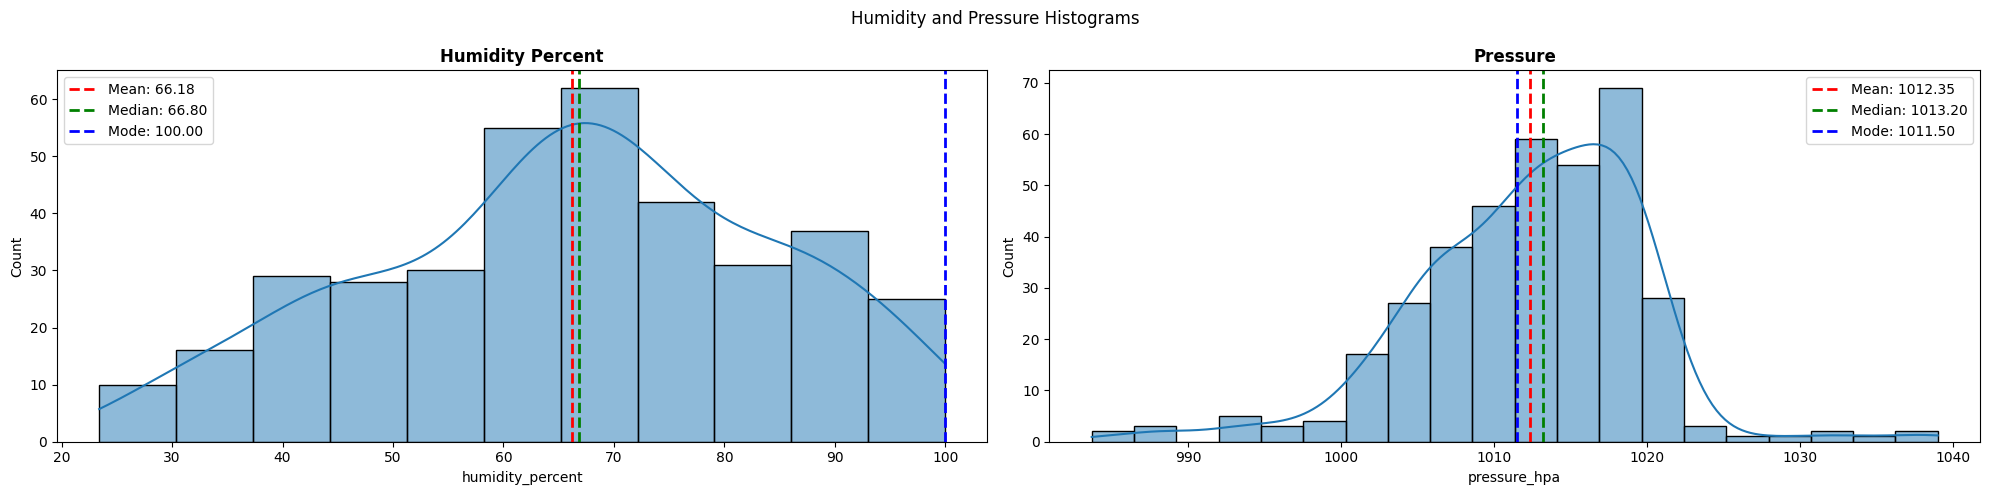

In [634]:
# Correlation tests

print()
print('pearsonr() correlation coefficents - Strength and Direction of the Linear Relationship')
correlation, p_value = stats.pearsonr(df_weather['humidity_percent'], df_weather['pressure_hpa'])
print('--------------------------------------------------')
print(f'pearsonr() p_value:{p_value}')
print(f'pearsonr() correlation:{correlation}')

if p_value < 0.05:
    print("Pressure/Humidity are DIFFERENT (reject null hypothesis)")
else:
    print("Pressure/Humidity Distributions are the SAME (fail to reject null hypothesis)")


print('spearmanr() correlation coefficents - rank correlation efficiency - strength and direction of the monotonic relationship')
statistic, p_value = stats.spearmanr(df_weather['humidity_percent'], df_weather['pressure_hpa'])
print('--------------------------------------------------')
print(f'spearmanr() p_value:{p_value}')
print(f'spearmanr() correlation:{statistic}')

if p_value < 0.05:
    print("Pressure/Humidity are DIFFERENT (reject null hypothesis)")
else:
    print("Pressure/Humidity Distributions are the SAME (fail to reject null hypothesis)")


fig, axes = plt.subplots(1,2, figsize=(20,5))
axes = axes.flatten()

plt.suptitle('Humidity and Pressure Histograms')
# Humidity
sns.histplot(data=df_weather, x='humidity_percent', ax=axes[0], kde=True, bins='auto')
axes[0].set_title(f'Humidity Percent', fontweight='bold')

# Calculate statistics
mean_val = df_weather['humidity_percent'].mean()
median_val = df_weather['humidity_percent'].median()
mode_val = df_weather['humidity_percent'].mode()[0]  # mode() returns a Series, take first value

# Plot mean, meadian and mode
axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
axes[0].axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')
axes[0].legend()
    
# Pressure
sns.histplot(data=df_weather, x='pressure_hpa', ax=axes[1], kde=True, bins='auto')
axes[1].set_title('Pressure', fontweight='bold')

# Calculate statistics
mean_val = df_weather['pressure_hpa'].mean()
median_val = df_weather['pressure_hpa'].median()
mode_val = df_weather['pressure_hpa'].mode()[0]  # mode() returns a Series, take first value

# Plot mean, meadian and mode
axes[1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
axes[1].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
axes[1].axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')
axes[1].legend()

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   

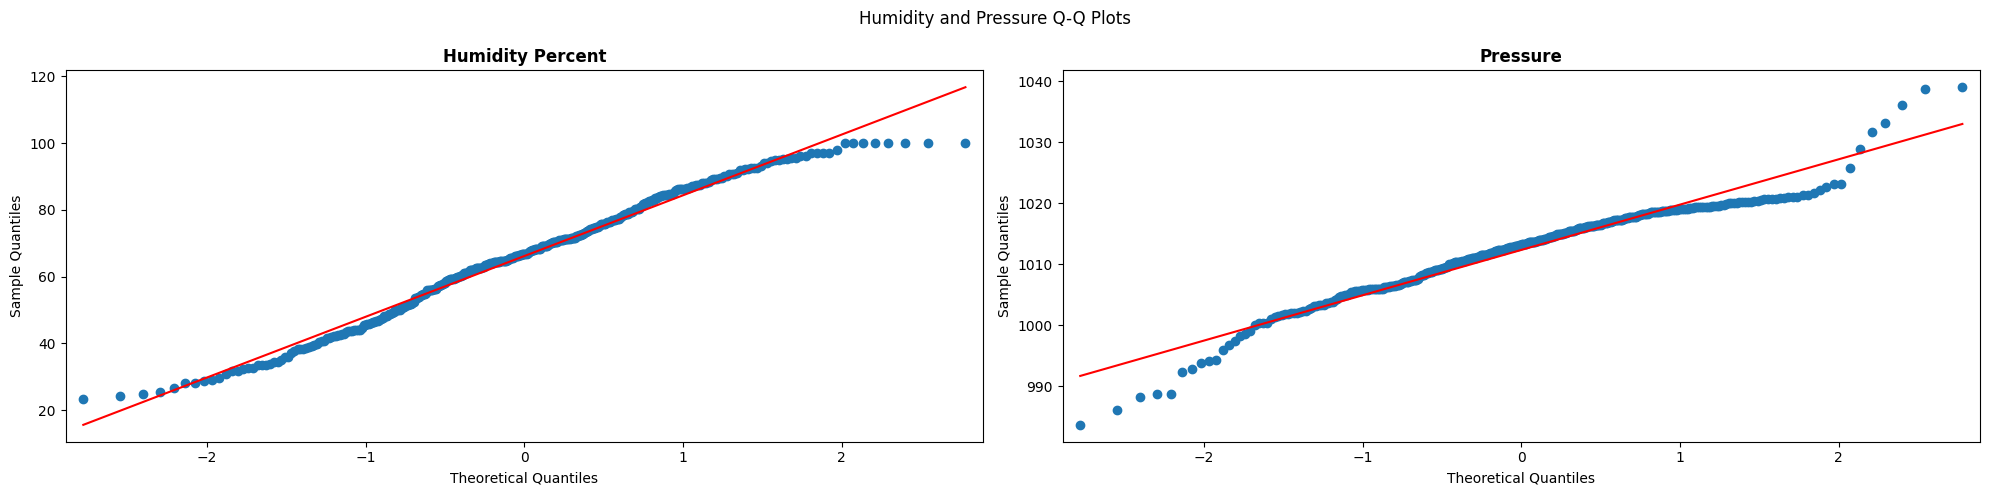

In [635]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes = axes.flatten()

plt.suptitle('Humidity and Pressure Q-Q Plots')

# Humidity
sm.qqplot(df_weather['humidity_percent'], ax=axes[0], line='s')
axes[0].set_title(f'Humidity Percent', fontweight='bold')

# Pressure
sm.qqplot(df_weather['pressure_hpa'], ax=axes[1], line='s')
axes[1].set_title('Pressure', fontweight='bold')

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()  

#### **Hypothesis for Humidity vs Pressure** ####
    Null Hypothesis --  Humidity and Pressure are NOT associated with each other (independent - (days randomly distributed)) #####
    Alternate Hypothesis -- Humidity and Pressure ARE associated - (days not randomly distributed)#####

In [636]:
# Calculate Coefficent of Determination -> R2

r_squared = correlation ** 2

print(f"Correlation (r) using pearsonr(): {correlation:.4f}")
print(f"R² (coefficient of determination): {r_squared:.4f}")
print(f"Percentage of variance explained: {r_squared * 100:.2f}%")

Correlation (r) using pearsonr(): -0.4710
R² (coefficient of determination): 0.2218
Percentage of variance explained: 22.18%


**Interpret the correlation coefficient**:
   - What is the direction of the relationship (positive or negative)?</br>
      Negative</br></br>
   - What is the strength of the relationship? (Hint: |r| < 0.3 weak, 0.3-0.7 moderate, > 0.7 strong)</br>
      Strength of relationship is moderate - [pearsonr->.47; spearmanr->.50]</br></br>
   - Calculate the coefficient of determination (r²) - what percentage of variance in one variable is explained by the other?</br>
      22% of variation in pressure can be explained by humidity